# Automatically selecting the number of clusters in a latent variable

This is just a quick demo to show how to automatically decide upon the number of clusters in a latent variable, where the number of clusters are unknown, using the Iris dataset.

The process is iterative, building and training the model multiple times, and then querying the trained model to extract the log likelihood. There are lots of other scoring functions; regression or classification accuracy, Bayesian Information Criterion (BIC; which penalises the complexity of the model against the accuracy) among others. One thing to watch is that the log likelihood cannot be used as a measure where the number of variables in the model is being adjusted at the same time, as the score will also change (however it's perfect when only changing the number of states).

It's easy to craft the iterative code, but there is a utility function in analysis.py to do it automatically and which uses cross validation.

In [4]:
import pandas as pd
import logging
import sys
sys.path.append("../../../bayesianpy")
import bayesianpy
import matplotlib.pyplot as plt
import os

logger = logging.getLogger()
logger.addHandler(logging.StreamHandler())
logger.setLevel(logging.INFO)

bayesianpy.jni.attach(logger)

db_folder = bayesianpy.utils.get_path_to_parent_dir('')    
iris = pd.read_csv(os.path.join(db_folder, "data/iris.csv"), index_col=False)

analysis = bayesianpy.analysis.LogLikelihoodAnalysis(logger)
# create templates between with latent states from 1 -> 19
results = analysis.analyse(iris, [bayesianpy.template.MixtureNaiveBayes(logger,
                                  discrete=iris[['iris_class']],
                                  continuous=iris[['sepal_length', 'petal_width', 'petal_length', 'sepal_width']],
                                  latent_states=i) for i in range(1, 20)],
                           use_model_names=False,
                           names=list(range(1,20)))

INFO:root:Writing 150 rows to storage
Writing 150 rows to storage
Writing 150 rows to storage
Writing 150 rows to storage
INFO:root:Finished writing 150 rows to storage
Finished writing 150 rows to storage
Finished writing 150 rows to storage
Finished writing 150 rows to storage
INFO:root:Training model...
Training model...
Training model...
Training model...
INFO:root:Finished training model
Finished training model
Finished training model
Finished training model
INFO:root:Using 1 processes to query 50 rows
Using 1 processes to query 50 rows
Using 1 processes to query 50 rows
Using 1 processes to query 50 rows
INFO:root:Queried case 0
Queried case 0
Queried case 0
Queried case 0
INFO:root:Training model...
Training model...
Training model...
Training model...
INFO:root:Finished training model
Finished training model
Finished training model
Finished training model
INFO:root:Using 1 processes to query 50 rows
Using 1 processes to query 50 rows
Using 1 processes to query 50 rows
Using 1 p

And finally plot the results:

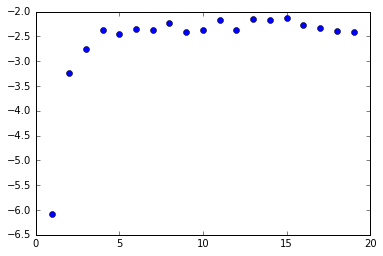

In [5]:
%matplotlib inline
plt.figure()
plt.plot(results.columns.tolist(), results.mean().tolist(), 'bo')
plt.show()

From this, it's possible to approximately identify the optimum number of states in the latent variable (e.g. 4+ or so, favouring the lower number to reduce complexity).